<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br>Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите файл с ответами в соответствующем Programming Assignment. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/13ZnT7w7foHD0uw0ynTtj7atdiCGvlltF8ThhbJCvLsc).  


## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [298]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
import re
import pickle
from tqdm import tqdm
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['patch.force_edgecolor'] = True

In [2]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = 'data'

In [280]:
from collections import Counter
def prepare_sites_dict(path_to_data, 
                       sites_dict_file='sites_dict.pkl',
                       inds_dict_file='ind_to_sites_dict.pkl',
                       refresh=False,
                       return_inds_dict=False):
    """Func to get dictionaries for converting site's name to it's index.
        If dictionary for data in PATH_TO_DATA has already been compiled, 
        functions just pickle dict out of files.
    """
    def get_dict():
        full_df = pd.DataFrame(columns=['site']) # UPD deleted 'timestamp'
        for file in tqdm(glob(path_to_data + '/*'), desc='Preparing sites dict...'):
            temp_df = pd.read_csv(file, usecols=['site'])  # UPD: added usecols
            full_df = full_df.append(temp_df, ignore_index=True)

        sites_freq_list = sorted(Counter(full_df.site).items(), 
                                 key=lambda x: x[1], reverse=True)
        sites_dict = dict((s, [i, freq]) for i, (s, freq) in enumerate(sites_freq_list, 1))
        if return_inds_dict:
            ind_to_sites_dict = dict((val[0], key) for key, val in sites_dict.items())
            ind_to_sites_dict[0] = 'no_site'
        else:
            ind_to_sites_dict = {}
        
        # Save dict to file
        with open(os.path.join(PATH_TO_DATA, sites_dict_file), 'wb') as fout:
            pickle.dump(sites_dict, fout)
        if return_inds_dict:
            with open(os.path.join(PATH_TO_DATA, inds_dict_file), 'wb') as fout:
                pickle.dump(ind_to_sites_dict, fout)
            
        return sites_dict, ind_to_sites_dict
    
    try:
        with open(os.path.join(PATH_TO_DATA, sites_dict_file), 'rb') as input_file:
            sites_dict = pickle.load(input_file)
        if return_inds_dict:    
            with open(os.path.join(PATH_TO_DATA, inds_dict_file), 'rb') as input_file:
                ind_to_sites_dict = pickle.load(input_file)
        else:
            ind_to_sites_dict = {}
            
    except FileNotFoundError:
        sites_dict, ind_to_sites_dict = get_dict()
        
    if refresh:
        sites_dict, ind_to_sites_dict = get_dict()
        
    return sites_dict, ind_to_sites_dict

In [207]:
randarr = np.arange(1, 31)

In [208]:
randarr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [231]:
window_size = 5
sess_len = 12

In [232]:
windptr = range(0, randarr.size, window_size)
list(windptr)

[0, 5, 10, 15, 20, 25]

In [233]:
session = []
for ptr in windptr:
    sess = randarr[ptr:ptr+sess_len]
    if len(sess) < sess_len:
        sess = np.r_[sess, [0]*(sess_len - len(sess))]
    session = np.r_[session, sess]
    print(ptr, randarr[ptr:ptr+sess_len])
session

# fill_with_zeros = sess_len - session.shape[0] % sess_len
# session = np.append(session, [0]*fill_with_zeros)
session = session.reshape(-1, sess_len)
session

0 [ 1  2  3  4  5  6  7  8  9 10 11 12]
5 [ 6  7  8  9 10 11 12 13 14 15 16 17]
10 [11 12 13 14 15 16 17 18 19 20 21 22]
15 [16 17 18 19 20 21 22 23 24 25 26 27]
20 [21 22 23 24 25 26 27 28 29 30]
25 [26 27 28 29 30]


array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
       [ 6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.],
       [11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.],
       [16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.],
       [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,  0.,  0.],
       [26., 27., 28., 29., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [198]:
def to_csr(X):
    session_length = X.shape[1]
    data = [1] * X.ravel().shape[0]
    indices = X.ravel()
    indptr = range(0, X.ravel().shape[0] + session_length, session_length)
    return csr_matrix((data, indices, indptr))[:, 1:]

In [239]:
def prepare_sparse_train_set_window(path_to_csv_files, site_freq_path, 
                                    session_length=10, window_size=10,
                                    refresh_dict=False):
    """Func for partition users logs to desireable num of sessions
        and prepare training dataset with sessions of particular users.
    
    """
    full_df = pd.DataFrame()
    
    sites_dict, _ = prepare_sites_dict(path_to_csv_files,
                                               sites_dict_file=site_freq_path,
                                               refresh=refresh_dict)
        
    for file in tqdm(glob(path_to_csv_files +'/*'), desc='Preparing training set...'):
        temp_df = pd.read_csv(file, usecols=['site'])  # UPD: deleted parse_dates, added usecols
        temp_df['site_id'] = temp_df.site.apply(lambda x: sites_dict[x][0])
        
        # Convert with sliding window
        windptr = range(0, temp_df.shape[0], window_size)
        sessions = []
        for ptr in windptr:
            sess = temp_df.site_id.values[ptr:ptr+session_length]
            # All incomplete sessions are being completed by zeros
            if len(sess) < session_length:
                sess = np.r_[sess, [0] * (session_length - len(sess))]
            sessions = np.r_[sessions, sess]
            
        # Partition user data to sessions
        sessions = sessions.reshape(-1, session_length)
        
        # Construct the full dataset, consist of user id's and sessions
        temp_df = pd.DataFrame(sessions,
                       columns=['site'+ str(x+1) for x in range(session_length)])
        # Find username in the file name
        user_id = re.findall(r'\d+', file)[-1]
        temp_df['user_id'] = [int(user_id)] * temp_df.shape[0]
        
        full_df = full_df.append(temp_df, ignore_index=True)
        
        X, y = full_df.iloc[:, :-1].values, full_df.iloc[:, -1].values
    
    return to_csr(X), y

In [257]:
X, y = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'3users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_3users.pkl'),
                                       session_length=10, window_size=5)

Preparing training set...: 100%|██████████| 3/3 [00:00<00:00, 74.16it/s]


**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [259]:
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'3users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_3users.pkl'),
                                       session_length=5, window_size=3, refresh_dict=False)

Preparing training set...: 100%|██████████| 3/3 [00:00<00:00, 260.40it/s]


In [267]:
X_toy_s5_w3.todense()

matrix([[0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0],
        [3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [268]:
y_s5_w3

array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3])

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [269]:
for num_users in [10, 150]:
    print(os.path.join(PATH_TO_DATA, str(num_users)+'users'))
    print(os.path.join(PATH_TO_DATA, f'site_freq_{num_users}users.pkl'))

data/10users
data/site_freq_10users.pkl
data/150users
data/site_freq_150users.pkl


In [279]:
%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    path_to_csv = os.path.join(PATH_TO_DATA, f'{num_users}users')
    path_to_pickle = os.path.join(PATH_TO_DATA, f'site_freq_{num_users}users.pkl')
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            X_sparse, y = prepare_sparse_train_set_window(path_to_csv,
                                                          path_to_pickle,
                                                          session_length=session_length,
                                                          window_size=window_size,
                                                          refresh_dict=False)
            X_fout = os.path.join(PATH_TO_DATA, f'X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl')
            y_fout = os.path.join(PATH_TO_DATA, f'y_{num_users}users_s{session_length}_w{window_size}.pkl')
            with open(X_fout, 'wb') as fout:
                pickle.dump(X_sparse, fout)
            with open(y_fout, 'wb') as fout:
                pickle.dump(y, fout)
            
            data_lengths.append(X_sparse.shape[0])

Preparing training set...: 100%|██████████| 150/150 [00:10<00:00, 14.34it/s]


CPU times: user 1min 28s, sys: 16.4 s, total: 1min 45s
Wall time: 1min 42s


**<font color='red'> Вопрос 1. </font>Сколько всего уникальных значений в списке `data_lengths`?**

In [283]:
len(set(data_lengths))

6

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [286]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), 
                       index_col='session_id')

In [287]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,
0,192,574,133,3,133,133,3,133,203,133,31
1,415,193,674,254,133,31,393,3305,217,55,31
2,55,3,55,55,5,293,415,333,897,55,31
3,473,3306,473,55,55,55,55,937,199,123,31
4,342,55,5,3307,258,211,3308,2086,675,2086,31


In [288]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
site1      14061 non-null int64
site2      14061 non-null int64
site3      14061 non-null int64
site4      14061 non-null int64
site5      14061 non-null int64
site6      14061 non-null int64
site7      14061 non-null int64
site8      14061 non-null int64
site9      14061 non-null int64
site10     14061 non-null int64
user_id    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [289]:
train_df['user_id'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_id, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [290]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [291]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

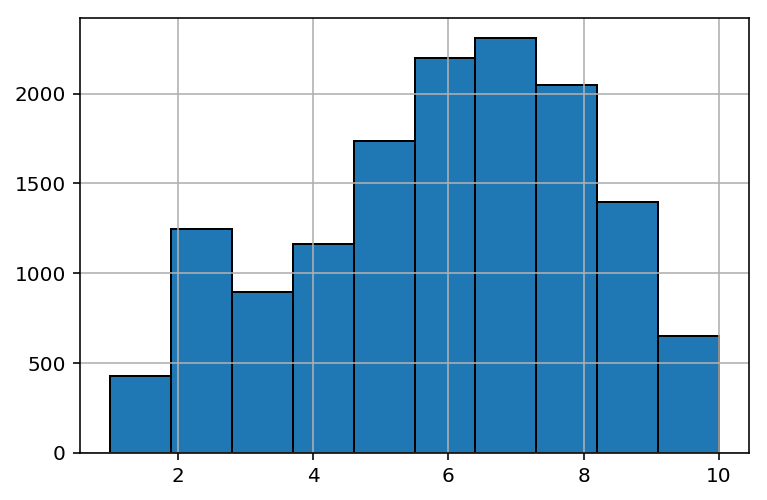

In [299]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально**

**<font color='red'> Вопрос 2. </font>Распределено ли нормально число уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов (согласно критерию Шапиро-Уилка)?**

(0.9546933174133301, 0.0)


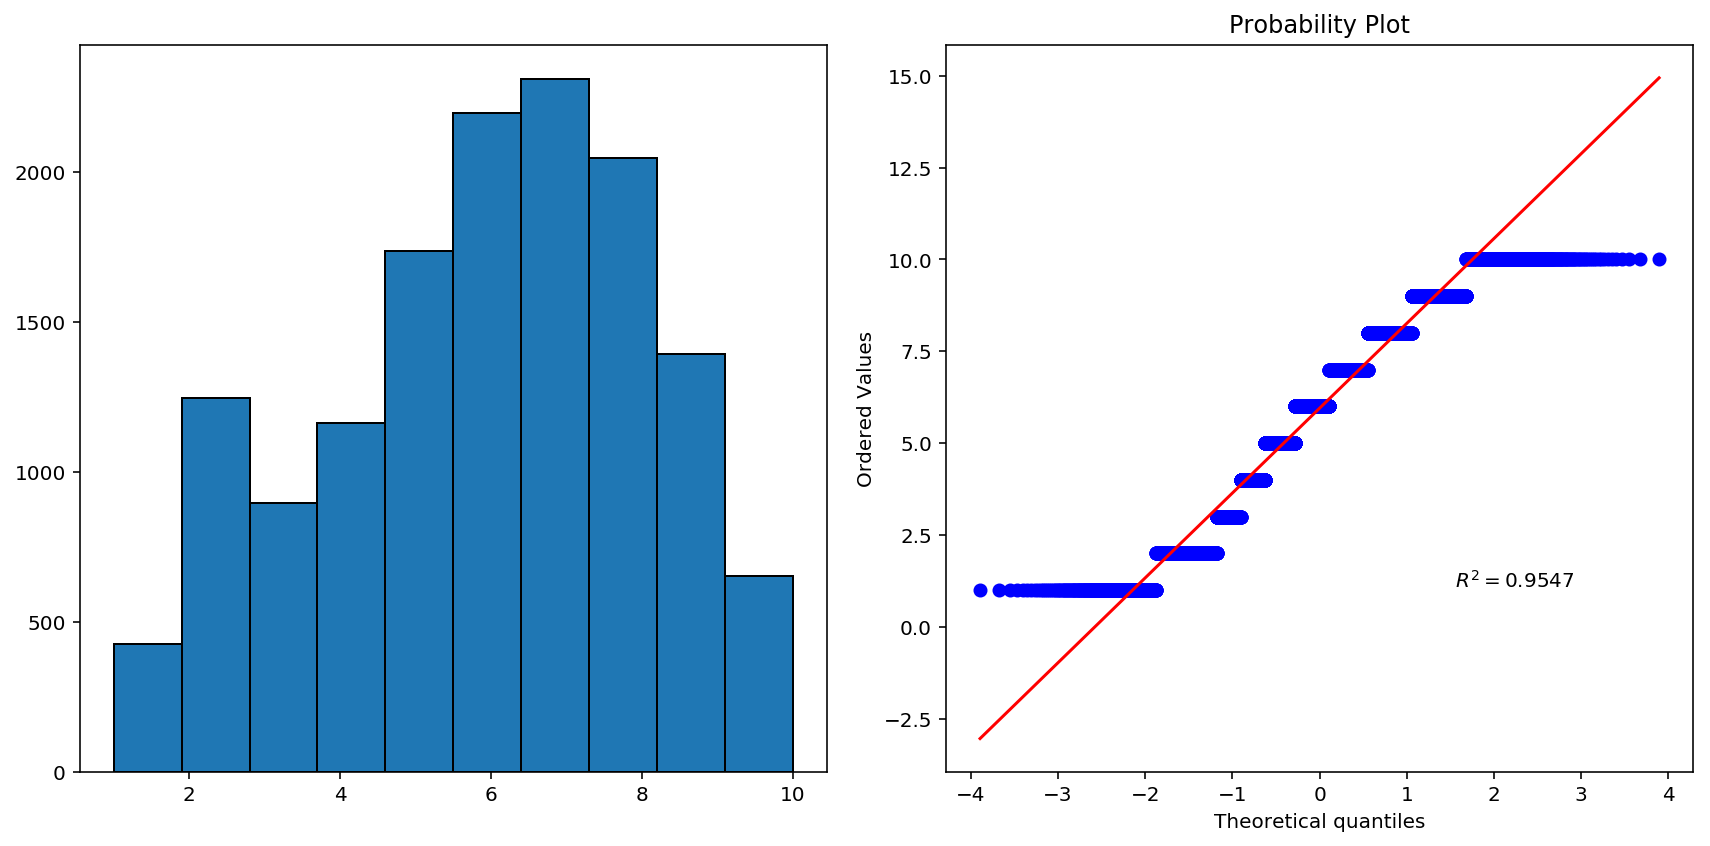

In [315]:
print(stats.shapiro(num_unique_sites))
fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].hist(num_unique_sites);
stats.probplot(num_unique_sites, dist='norm', plot=ax[1], rvalue=True)
fig.tight_layout();

**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

**<font color='red'> Вопрос 3. </font>Каково p-value при проверке описанной гипотезы?**

In [317]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')

In [322]:

has_two_similar

array([1, 0, 1, ..., 1, 1, 1])

Проверяется нулевая гипотеза:
- $H_0:$ доля сессий с повторяющимися сайтами = 95%. Против альтернативы:
- $H_1:$ доля таких сессий больше чем 95%

In [333]:
stats.binom_test(has_two_similar.sum(), len(num_unique_sites),
                 p=0.95, alternative='greater')


0.02207653769072678

In [339]:
import statsmodels.stats.proportion as psts
psts.proportions_ztest(has_two_similar.sum(), len(has_two_similar), value=0.95,
                       prop_var=0.95, alternative='larger')

(2.0140294880759764, 0.02200321881301778)

**<font color='red'> Вопрос 4. </font>Каков 95% доверительный интервал Уилсона для доли случаев, когда пользователь повторно посетил какой-то сайт (из п. 3)?**

In [343]:
wilson_interval = psts.proportion_confint(has_two_similar.sum(), len(has_two_similar),
                                          method='wilson')
wilson_interval

(0.9501028841411286, 0.9570527377232229)

In [345]:
print('{:.4f} {:.4f}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)))

0.9500 0.9570


**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

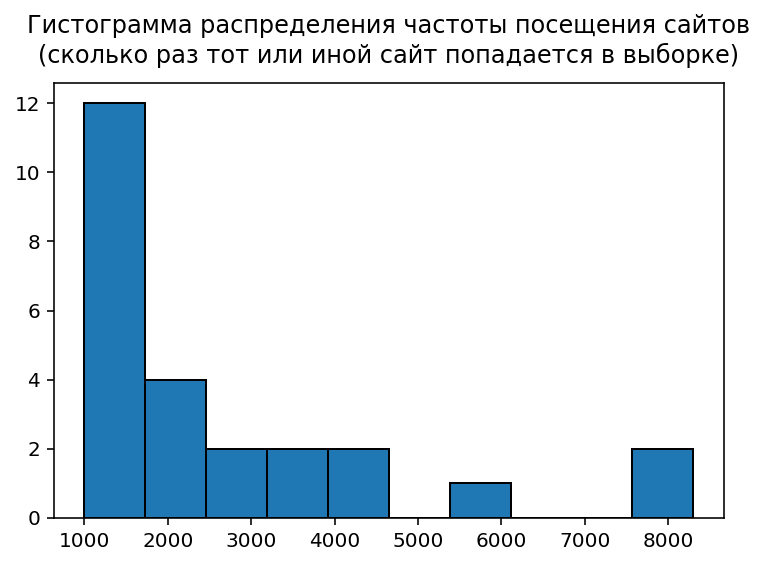

In [361]:
with open('data/site_freq_10users.pkl', 'rb') as f_in:
    site_freqs = pickle.load(f_in)
site_freq_df = pd.DataFrame(site_freqs).T
site_freq_df.columns = (['site_id', 'freq'])
top_site_freq_df = site_freq_df[site_freq_df.freq >= 1000]
top_site_freq_df.freq.hist(grid=False)
plt.title('Гистограмма распределения частоты посещения сайтов\n(сколько раз тот или иной сайт попадается в выборке)', y=1.02);

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

**<font color='red'> Вопрос 5. </font>Каков 95% доверительный интервал для средней частоты появления сайта в выборке?**

In [362]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [363]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [367]:
boot_means = get_bootstrap_samples(site_freq_df.freq.values,
                                   site_freq_df.freq.values.size).mean(axis=1)

stat_intervals(boot_means, 0.05)

array([22.51524527, 35.76303684])

## Пути улучшения
Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.